# Stock Price Predictor using Feed Forward Neural Network, Recurrent Neural Network and LSTM

Get IBM stock market data and evaluate prediction on a set of recurrent neural networks.

Dataset can be downloaded from https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231



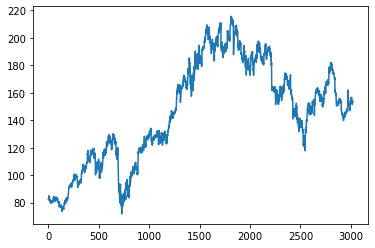

In [ ]:
# load ibm data file here

# Use github for remote file
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/Shahrukh95/Stock-Price-Predictor/main/IBM_2006-01-01_to_2018-01-01.csv')
data["Close"].plot()

Load data and prepare the dataset

In [ ]:
x_values_all = data["Close"]
d = {'x1': [], 'x2': [], 'x3':[], 'x4':[], 'x5':[], 'y':[]}

for all_range in range(0,len(x_values_all)):
  if all_range + 5 >= len(x_values_all):
    continue
  d['x1'].append(x_values_all[all_range])
  d['x2'].append(x_values_all[all_range + 1])
  d['x3'].append(x_values_all[all_range + 2])
  d['x4'].append(x_values_all[all_range + 3])
  d['x5'].append(x_values_all[all_range + 4])
  d['y'].append(x_values_all[all_range + 5])

df = pd.DataFrame(data=d)
df

,x1,x2,x3,x4,x5,y
0,82.06,81.95,82.50,84.95,83.73,84.07
1,81.95,82.50,84.95,83.73,84.07,84.17
2,82.50,84.95,83.73,84.07,84.17,83.57
3,84.95,83.73,84.07,84.17,83.57,83.17
4,83.73,84.07,84.17,83.57,83.17,83.00
...,...,...,...,...,...,...
3010,152.50,153.33,153.23,152.95,151.50,152.50
3011,153.33,153.23,152.95,151.50,152.50,152.83
3012,153.23,152.95,151.50,152.50,152.83,153.13
3013,152.95,151.50,152.50,152.83,153.13,154.04


Perform prediction by using feed-forward neural network (sliding window)

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

# normalize the data frame columns
df=(df-df.min())/(df.max()-df.min())

# Spilt testing and training
train, test = train_test_split(df, test_size=0.2, shuffle=True)

# separate input and output
x_train = train[['x1','x2','x3','x4','x5']].values
y_train = train[['y']].values

x_test = test[['x1','x2','x3','x4','x5']].values
y_test = test[['y']].values

# Check shape of inputs and ouputs
print("X Train:",x_train.shape)
print("Y Train:",y_train.shape)

print("X Test:",x_test.shape)
print("Y Test:",y_test.shape)

# define the keras model
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

model_NN = Sequential()
model_NN.add(Dense(50, input_shape=(5,), activation='relu'))
model_NN.add(Dense(50, activation='relu'))
model_NN.add(Dense(1, activation='sigmoid'))

# compile the model
# Use mean squared error for use later in subtask 5
model_NN.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

# fit the keras model on the dataset
hist_NN = model_NN.fit(x_train, y_train, batch_size=10, epochs=20, validation_data=(x_test, y_test))

X Train: (2412, 5)
Y Train: (2412, 1)
X Test: (603, 5)
Y Test: (603, 1)
Epoch 1/20
242/242 [==============================] - 4s 11ms/step - loss: 0.0512 - accuracy: 8.2919e-04 - val_loss: 0.0494 - val_accuracy: 0.0000e+00
Epoch 2/20
242/242 [==============================] - 3s 12ms/step - loss: 0.0429 - accuracy: 8.2919e-04 - val_loss: 0.0409 - val_accuracy: 0.0000e+00
Epoch 3/20
242/242 [==============================] - 3s 13ms/step - loss: 0.0353 - accuracy: 8.2919e-04 - val_loss: 0.0334 - val_accuracy: 0.0000e+00
Epoch 4/20
242/242 [==============================] - 2s 6ms/step - loss: 0.0284 - accuracy: 8.2919e-04 - val_loss: 0.0267 - val_accuracy: 0.0000e+00
Epoch 5/20
242/242 [==============================] - 1s 5ms/step - loss: 0.0227 - accuracy: 8.2919e-04 - val_loss: 0.0213 - val_accuracy: 0.0000e+00
Epoch 6/20
242/242 [==============================] - 1s 5ms/step - loss: 0.0181 - accuracy: 8.2919e-04 - val_loss: 0.0170 - val_accuracy: 0.0000e+00
Epoch 7/20
242/242 [=====

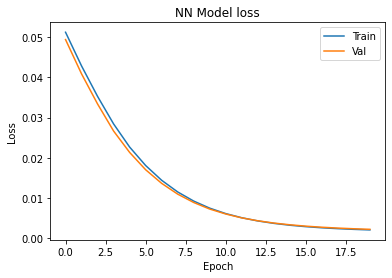

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist_NN.history['loss'])
plt.plot(hist_NN.history['val_loss'])
plt.title('NN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
predictions_NN = (model_NN.predict(x_test))
# Predicting the first 10 cases from x_test
for i in range(10):
	print('%s => %f (expected %f)' % (x_test[i].tolist(), predictions_NN[i], y_test[i]))

19/19 [==============================] - 0s 2ms/step
[0.5288768568651951, 0.5268638067471886, 0.5243648479800084, 0.5369984728585312, 0.5350548382618353] => 0.535027 (expected 0.543246)
[0.7942523948354853, 0.799875052061641, 0.7838400666389005, 0.7982090795501874, 0.7156046091906151] => 0.783939 (expected 0.708316)
[0.32146327918922674, 0.3120227682909899, 0.30785783701235603, 0.30952380952380953, 0.31736776343190337] => 0.303614 (expected 0.315285)
[0.5187421907538525, 0.5244342635013188, 0.5247813411078718, 0.5430376232125503, 0.5359572400388727] => 0.535385 (expected 0.535194)
[0.7975843398583923, 0.7931417464945162, 0.8188949049007359, 0.8068166041926975, 0.8027210884353742] => 0.797996 (expected 0.801888)
[0.6071081493822018, 0.6167569068443705, 0.6154380119394697, 0.6311953352769679, 0.6161321671525753] => 0.631813 (expected 0.606969)
[0.18575593502707208, 0.1804109398861586, 0.17471886713869222, 0.1542412883520755, 0.14716090517839792] => 0.193917 (expected 0.142510)
[0.8000832

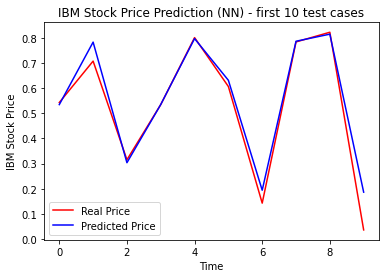

In [ ]:
plt.plot(y_test[:10], color = 'red', label = 'Real Price')
plt.plot(predictions_NN[:10], color = 'blue', label = 'Predicted Price')
plt.title('IBM Stock Price Prediction (NN) - first 10 test cases')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()

Perform prediction by using RNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import SimpleRNN

model_RNN = Sequential()
model_RNN.add(SimpleRNN(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
model_RNN.add(Dropout(0.2))
model_RNN.add(SimpleRNN(units = 50))
model_RNN.add(Dropout(0.2))
model_RNN.add(Dense(units = 1))

model_RNN.compile(optimizer = 'adam',loss = 'mean_squared_error', metrics=['accuracy'])

hist_RNN = model_RNN.fit(x_train,y_train,epochs = 20, batch_size = 10, validation_data=(x_test, y_test))

Epoch 1/20
242/242 [==============================] - 4s 7ms/step - loss: 0.0245 - accuracy: 8.2919e-04 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 2/20
242/242 [==============================] - 1s 6ms/step - loss: 0.0085 - accuracy: 8.2919e-04 - val_loss: 5.5790e-04 - val_accuracy: 0.0000e+00
Epoch 3/20
242/242 [==============================] - 1s 5ms/step - loss: 0.0051 - accuracy: 8.2919e-04 - val_loss: 6.3088e-04 - val_accuracy: 0.0000e+00
Epoch 4/20
242/242 [==============================] - 1s 6ms/step - loss: 0.0040 - accuracy: 8.2919e-04 - val_loss: 5.6104e-04 - val_accuracy: 0.0000e+00
Epoch 5/20
242/242 [==============================] - 1s 6ms/step - loss: 0.0035 - accuracy: 8.2919e-04 - val_loss: 4.1570e-04 - val_accuracy: 0.0000e+00
Epoch 6/20
242/242 [==============================] - 2s 9ms/step - loss: 0.0032 - accuracy: 8.2919e-04 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 7/20
242/242 [==============================] - 1s 5ms/step - loss: 0.0028 - a

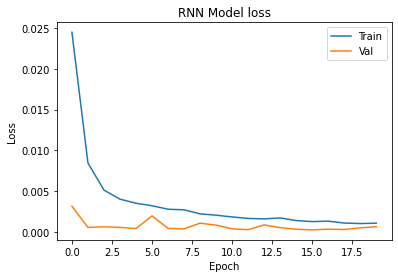

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist_RNN.history['loss'])
plt.plot(hist_RNN.history['val_loss'])
plt.title('RNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
predictions_RNN = (model_RNN.predict(x_test))
# Predicting the first 10 cases from x_test
for i in range(10):
	print('%s => %f (expected %f)' % (x_test[i].tolist(), predictions_RNN[i], y_test[i]))

19/19 [==============================] - 0s 2ms/step
[0.5288768568651951, 0.5268638067471886, 0.5243648479800084, 0.5369984728585312, 0.5350548382618353] => 0.521592 (expected 0.543246)
[0.7942523948354853, 0.799875052061641, 0.7838400666389005, 0.7982090795501874, 0.7156046091906151] => 0.713751 (expected 0.708316)
[0.32146327918922674, 0.3120227682909899, 0.30785783701235603, 0.30952380952380953, 0.31736776343190337] => 0.313880 (expected 0.315285)
[0.5187421907538525, 0.5244342635013188, 0.5247813411078718, 0.5430376232125503, 0.5359572400388727] => 0.521263 (expected 0.535194)
[0.7975843398583923, 0.7931417464945162, 0.8188949049007359, 0.8068166041926975, 0.8027210884353742] => 0.772854 (expected 0.801888)
[0.6071081493822018, 0.6167569068443705, 0.6154380119394697, 0.6311953352769679, 0.6161321671525753] => 0.599624 (expected 0.606969)
[0.18575593502707208, 0.1804109398861586, 0.17471886713869222, 0.1542412883520755, 0.14716090517839792] => 0.159998 (expected 0.142510)
[0.8000832

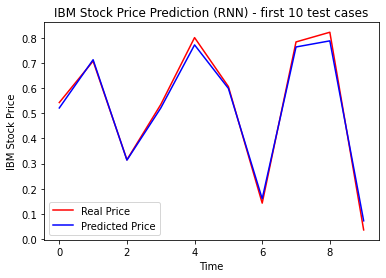

In [ ]:
plt.plot(y_test[:10], color = 'red', label = 'Real Price')
plt.plot(predictions_RNN[:10], color = 'blue', label = 'Predicted Price')
plt.title('IBM Stock Price Prediction (RNN) - first 10 test cases')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()

Perform prediction by using LSTM

In [ ]:
from keras.layers import LSTM

model_LSTM = Sequential()
model_LSTM.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(units = 50))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(Dense(units = 1))

model_LSTM.compile(optimizer = 'adam',loss = 'mean_squared_error', metrics=['accuracy'])

hist_LSTM = model_LSTM.fit(x_train,y_train,epochs = 20, batch_size = 10, validation_data=(x_test, y_test))

Epoch 1/20
242/242 [==============================] - 8s 13ms/step - loss: 0.0199 - accuracy: 8.2919e-04 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 2/20
242/242 [==============================] - 2s 9ms/step - loss: 0.0033 - accuracy: 8.2919e-04 - val_loss: 4.9172e-04 - val_accuracy: 0.0000e+00
Epoch 3/20
242/242 [==============================] - 2s 10ms/step - loss: 0.0027 - accuracy: 8.2919e-04 - val_loss: 8.5062e-04 - val_accuracy: 0.0000e+00
Epoch 4/20
242/242 [==============================] - 3s 13ms/step - loss: 0.0026 - accuracy: 8.2919e-04 - val_loss: 6.8626e-04 - val_accuracy: 0.0000e+00
Epoch 5/20
242/242 [==============================] - 2s 10ms/step - loss: 0.0026 - accuracy: 8.2919e-04 - val_loss: 5.1104e-04 - val_accuracy: 0.0000e+00
Epoch 6/20
242/242 [==============================] - 2s 9ms/step - loss: 0.0023 - accuracy: 8.2919e-04 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 7/20
242/242 [==============================] - 2s 10ms/step - loss: 0.001

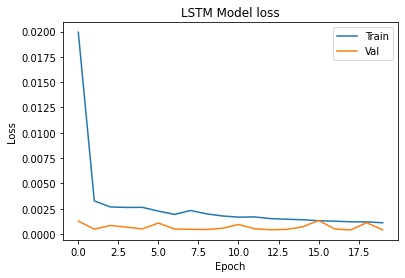

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist_LSTM.history['loss'])
plt.plot(hist_LSTM.history['val_loss'])
plt.title('LSTM Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
predictions_LSTM = (model_LSTM.predict(x_test))
# Predicting the first 10 cases from x_test
for i in range(10):
	print('%s => %f (expected %f)' % (x_test[i].tolist(), predictions_LSTM[i], y_test[i]))

19/19 [==============================] - 1s 3ms/step
[0.5288768568651951, 0.5268638067471886, 0.5243648479800084, 0.5369984728585312, 0.5350548382618353] => 0.526161 (expected 0.543246)
[0.7942523948354853, 0.799875052061641, 0.7838400666389005, 0.7982090795501874, 0.7156046091906151] => 0.770851 (expected 0.708316)
[0.32146327918922674, 0.3120227682909899, 0.30785783701235603, 0.30952380952380953, 0.31736776343190337] => 0.308229 (expected 0.315285)
[0.5187421907538525, 0.5244342635013188, 0.5247813411078718, 0.5430376232125503, 0.5359572400388727] => 0.525736 (expected 0.535194)
[0.7975843398583923, 0.7931417464945162, 0.8188949049007359, 0.8068166041926975, 0.8027210884353742] => 0.795154 (expected 0.801888)
[0.6071081493822018, 0.6167569068443705, 0.6154380119394697, 0.6311953352769679, 0.6161321671525753] => 0.613522 (expected 0.606969)
[0.18575593502707208, 0.1804109398861586, 0.17471886713869222, 0.1542412883520755, 0.14716090517839792] => 0.164566 (expected 0.142510)
[0.8000832

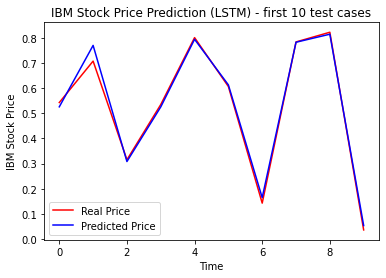

In [ ]:
plt.plot(y_test[:10], color = 'red', label = 'Real Price')
plt.plot(predictions_LSTM[:10], color = 'blue', label = 'Predicted Price')
plt.title('IBM Stock Price Prediction (LSTM) - first 10 test cases')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()

Compare all above results by using MSE error and dermine the best architecture. You can do tests on more stock data than IBM.

In [ ]:
print("All models above use the mean squared error.")

All models above use the mean squared error.


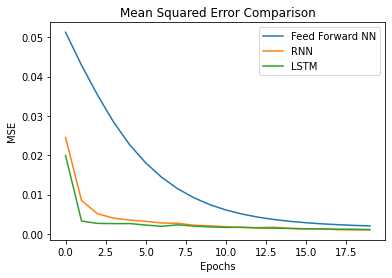

In [ ]:
plt.plot(hist_NN.history['loss'])
plt.plot(hist_RNN.history['loss'])
plt.plot(hist_LSTM.history['loss'])
plt.title('Mean Squared Error Comparison')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend(['Feed Forward NN', 'RNN', 'LSTM'], loc='upper right')
plt.show()

In [ ]:
print("Neural Network Loss: ", hist_NN.history['loss'][-1])
print("RNN Loss: ", hist_RNN.history['loss'][-1])
print("LSTM Loss: ", hist_LSTM.history['loss'][-1])

Neural Network Loss:  0.0020445312839001417
RNN Loss:  0.001077677239663899
LSTM Loss:  0.0011157930130138993


In [3]:
print("LSTM converges the fastest followed by RNN and then feed forward NN. Hence LSTM is the best predictor among our models.")

LSTM converges the fastest followed by RNN and then feed forward NN. Hence LSTM is the best predictor among our models.
